In [ ]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go




from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))

In [ ]:
review = df1.copy()
review.head()

,review,sentiment,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,One of the other reviewers has mentioned that ...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A wonderful little production. <br /><br />The...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I thought this was a wonderful way to spend ti...,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Basically there's a family where a little boy ...,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       49999 non-null  object
 1   sentiment    49999 non-null  object
 2   Unnamed: 2   1 non-null      object
 3   Unnamed: 3   1 non-null      object
 4   Unnamed: 4   1 non-null      object
 5   Unnamed: 5   1 non-null      object
 6   Unnamed: 6   1 non-null      object
 7   Unnamed: 7   1 non-null      object
 8   Unnamed: 8   1 non-null      object
 9   Unnamed: 9   1 non-null      object
 10  Unnamed: 10  1 non-null      object
 11  Unnamed: 11  1 non-null      object
 12  Unnamed: 12  1 non-null      object
 13  Unnamed: 13  1 non-null      object
dtypes: object(14)
memory usage: 5.3+ MB


In [ ]:
review.isna().sum()

review             0
sentiment          0
Unnamed: 2     49998
Unnamed: 3     49998
Unnamed: 4     49998
Unnamed: 5     49998
Unnamed: 6     49998
Unnamed: 7     49998
Unnamed: 8     49998
Unnamed: 9     49998
Unnamed: 10    49998
Unnamed: 11    49998
Unnamed: 12    49998
Unnamed: 13    49998
dtype: int64

In [ ]:
#drop columns with null value
data = review.dropna(axis=1)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49994,I thought this movie did a down right good job...,positive
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49996,I am a Catholic taught in parochial elementary...,negative
49997,I'm going to have to disagree with the previou...,negative


In [ ]:
#Run SQL Queries In Python
from pandasql import sqldf
query = "SELECT sentiment,count(sentiment) as cnt from data group by sentiment"
df_sentiment = sqldf(query)
df_sentiment.head()

,sentiment,cnt
0,Jim Abrahams,1
1,negative,24999
2,positive,24999


In [ ]:
# filter and retain rows where the "sentiment" column is not equal to "Jim Abrahams."
df = data[data['sentiment']!= " Jim Abrahams"]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49994,I thought this movie did a down right good job...,positive
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49996,I am a Catholic taught in parochial elementary...,negative
49997,I'm going to have to disagree with the previou...,negative


In [ ]:
# filter and retain rows where the "sentiment" column is not equal to "Jim Abrahams."
df = data[data['sentiment']!= " Jim Abrahams"]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49994,I thought this movie did a down right good job...,positive
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49996,I am a Catholic taught in parochial elementary...,negative
49997,I'm going to have to disagree with the previou...,negative


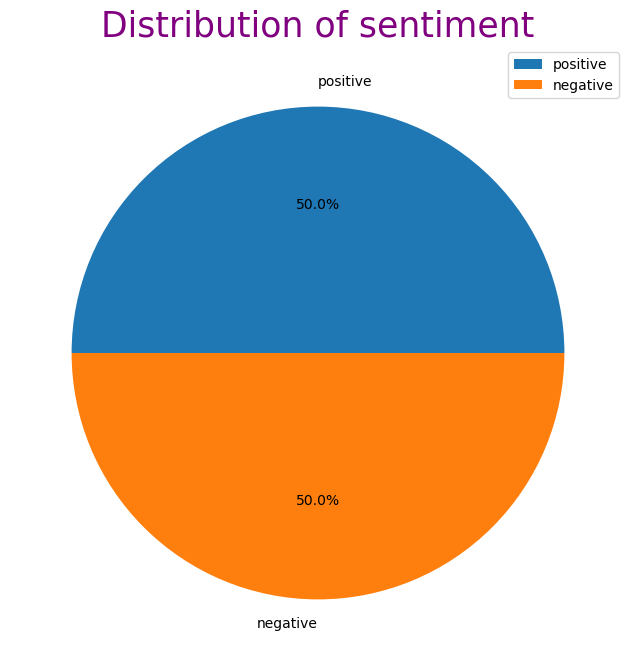

In [ ]:
plt.figure(figsize=(8, 8))

ax =df.sentiment.value_counts()
labels=df['sentiment'].value_counts().index
plt.pie(ax,labels=labels,autopct='%1.1f%%')
plt.title("Distribution of sentiment",fontsize=25,color='purple')
plt.legend(loc='upper right')
plt.show()

C:\Users\83908\AppData\Local\Temp\ipykernel_14580\1017228031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].astype(str)


Text(0.5, 1.0, 'Negative Reviews')

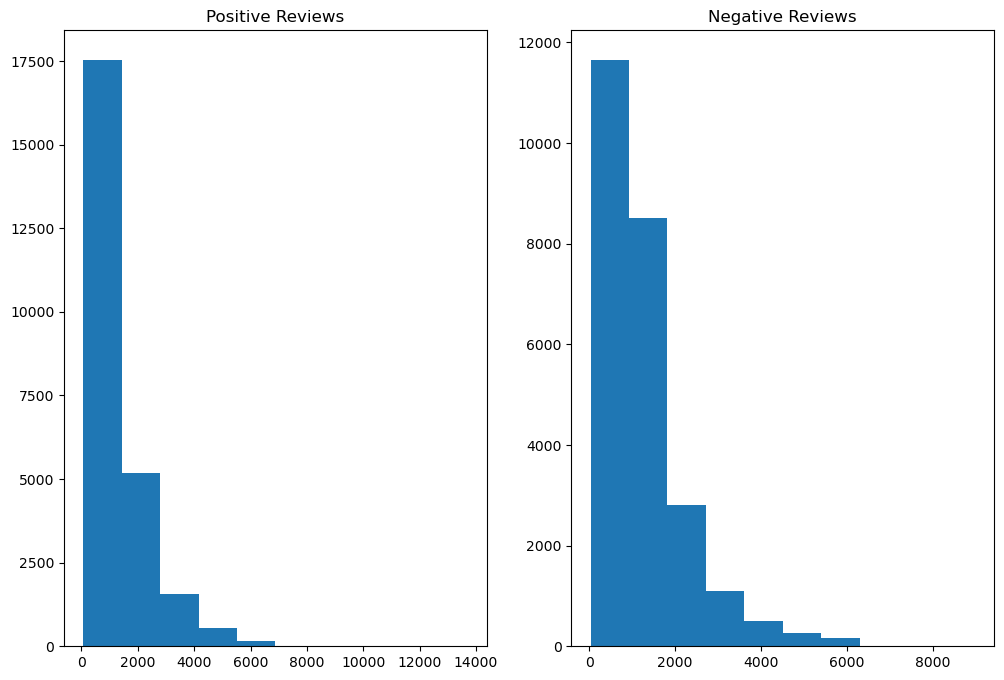

In [ ]:
#calculates the length of each string in the 'review' column and plot histogram
df['review'] = df['review'].astype(str)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

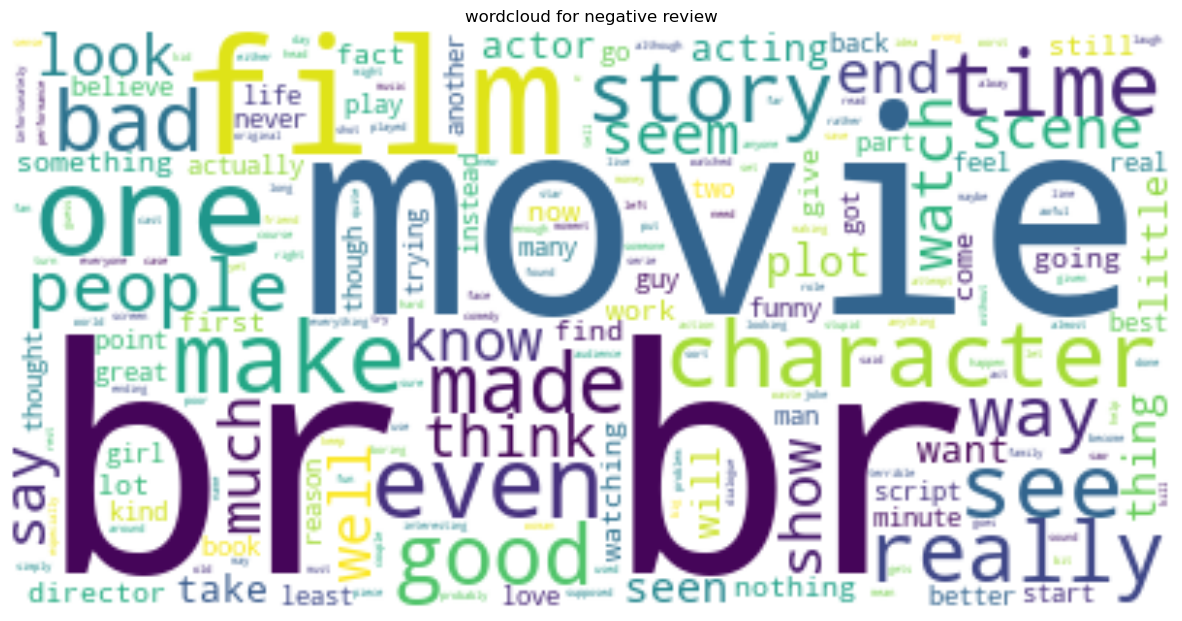

In [ ]:
#wordcloud of negative reviews
from wordcloud import WordCloud
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [ ]:
#convert review strings into lowercase
df['review_text'] = df['review'].str.lower()

<ipython-input-13-33b4542e214b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review'].str.lower()


In [ ]:
#define clean_regex to conduct text cleaning operations
#detect and extract URLs from text by looking for patterns that resemble common URL structures
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# write a regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'

def clean_regex(text_variable):

    # use regular expression to replace urls by token - urlplaceholder
    text_variable = re.sub(url_regex, 'urlplaceholder', text_variable)

    # use regular expression to replace non ascii characters by a space
    text_variable = re.sub(non_ascii_regex, ' ', text_variable)

    return text_variable

In [ ]:
#Use np.vectorize to adapt the clean_regex function on df["review"]
df["review_text"] = np.vectorize(clean_regex)(df["review_text"])

<ipython-input-15-d89ae697ecf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["review_text"] = np.vectorize(clean_regex)(df["review_text"])


In [ ]:
#remove punctuation in the review
import string
def punctuation_removal(punc):
    rem_punc = [i for i in punc if i not in string.punctuation]
    after_punc = ''.join(rem_punc)
    return after_punc

df['review_text'] = df['review_text'].apply(punctuation_removal)
df.head()

<ipython-input-16-e9abce8c7ea3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].apply(punctuation_removal)


,review,sentiment,review_text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


In [ ]:
# remove stop word such as “a,” “the,” “is,” “are"
stop_words = stopwords.words()
df['review_text'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df

<ipython-input-17-3344cb6138fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,review,sentiment,review_text
0,One of the other reviewers has mentioned that ...,positive,reviewers mentioned watching 1 oz episode youl...
1,A wonderful little production. <br /><br />The...,positive,wonderful production br br filming technique u...
2,I thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sittin...
3,Basically there's a family where a little boy ...,negative,basically family boy jake thinks zombie closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49994,I thought this movie did a down right good job...,positive,movie job creative original expecting lotta fu...
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,plot dialogue acting idiotic directing annoyin...
49996,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49997,I'm going to have to disagree with the previou...,negative,disagree previous comment side maltin rate exc...


In [ ]:
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenization of sentence into list of words and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #print(nltk_tagged) #('reviewers', 'NNS')
    #NLTK POS tags have been mapped to WordNet POS tags ('n' for noun, 'v' for verb, 'a' for adjective, etc.).
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    print(wordnet_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        print(word,tag)
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to Lemmatize word to reduce words to their base form
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
df['review_text'] = df['review_text'].apply(lemmatize_sentence)
df

流式输出内容被截断，只能显示最后 5000 行内容。
dangerously r
artistic a
perspective n
instead r
awkward a
attempt n
redeem v
boring v
clumsy a
movie n
boring v
clumsy a
plot n
poorly r
hintedat a
sexual a
tension n
hinted v
heavyhandedly r
anticipation a
flaccid n
snogging v
scene n
pushed v
film n
totem n
pole a
mediocrity n
warranting v
criticism n
film n
sucking v
lacks n
inherent a
grace n
suck v
properly r
mock v
haranguebr n
br n
film n
lot n
artistic a
fumbling n
meat n
lot n
aggravation n
alright v
fact n
cheering v
bludgeoning v
final a
scene n
tableau n
made v
indication n
terribly r
wrong a
film n
moving v
briskly a
implies n
movie n
oozed v
languidly r
forward r
sweat n
trail n
working v
side n
nose a
hands n
full a
argh a
sensation n
pretty r
sums a
gutwrenching v
frustration n
realized v
watching v
train n
wreck n
breath n
fresh a
air n
regard a
movie n
stale n
miasma n
ideas n
poorly r
realized v
putrefying v
coming v
fruition n
movie n
made v
italians n
itbr a
br n
duke n
mitchell n
ahole 

<ipython-input-23-0051059a138a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].apply(lemmatize_sentence)


,review,sentiment,review_text
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch 1 oz episode youll hook...
1,A wonderful little production. <br /><br />The...,positive,wonderful production br br film technique unas...
2,I thought this was a wonderful way to spend ti...,positive,wonderful spend time hot summer weekend sit ai...
3,Basically there's a family where a little boy ...,negative,basically family boy jake think zombie closet ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...
49994,I thought this movie did a down right good job...,positive,movie job creative original expect lotta fun d...
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,plot dialogue act idiotic direct annoy porn gr...
49996,I am a Catholic taught in parochial elementary...,negative,catholic teach parochial elementary school nun...
49997,I'm going to have to disagree with the previou...,negative,disagree previous comment side maltin rate exc...


In [ ]:
df.sentiment = [0 if each == "negative" else 1 for each in df.sentiment]

<ipython-input-24-40bcadbbaae4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment = [0 if each == "negative" else 1 for each in df.sentiment]


In [ ]:
df

,review,sentiment,review_text
0,One of the other reviewers has mentioned that ...,1,reviewer mention watch 1 oz episode youll hook...
1,A wonderful little production. <br /><br />The...,1,wonderful production br br film technique unas...
2,I thought this was a wonderful way to spend ti...,1,wonderful spend time hot summer weekend sit ai...
3,Basically there's a family where a little boy ...,0,basically family boy jake think zombie closet ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...
...,...,...,...
49994,I thought this movie did a down right good job...,1,movie job creative original expect lotta fun d...
49995,"Bad plot, bad dialogue, bad acting, idiotic di...",0,plot dialogue act idiotic direct annoy porn gr...
49996,I am a Catholic taught in parochial elementary...,0,catholic teach parochial elementary school nun...
49997,I'm going to have to disagree with the previou...,0,disagree previous comment side maltin rate exc...


In [ ]:
df_model = df[['review_text', 'sentiment']]
df_model

,review_text,sentiment
0,reviewer mention watch 1 oz episode youll hook...,1
1,wonderful production br br film technique unas...,1
2,wonderful spend time hot summer weekend sit ai...,1
3,basically family boy jake think zombie closet ...,0
4,petter matteis love time money visually stunni...,1
...,...,...
49994,movie job creative original expect lotta fun d...,1
49995,plot dialogue act idiotic direct annoy porn gr...,0
49996,catholic teach parochial elementary school nun...,0
49997,disagree previous comment side maltin rate exc...,0


In [ ]:
#The CountVectorizer object can be used to transform a collection of text documents into a matrix of token counts

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))
X_vec = vectorizer.fit_transform(df_model['review_text'])

In [ ]:
subset = X_vec[:30, :30].toarray()
print(subset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, df_model.sentiment.values, random_state=606)

In [ ]:
#TF-IDF not only focuses on the frequency of words but also provides the importance of the words.

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_wm = tfidf_vectorizer.fit_transform(df_model['review_text'])

df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray())
# print("Count Vectorizer\n")
# print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

            0    1    2    3         4         5    6    7    8    9    ...  \
0      0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
1      0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
2      0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
3      0.122405  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
4      0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
...         ...  ...  ...  ...       ...       ...  ...  ...  ...  ...  ...   
49993  0.000000  0.0  0.0  0.0  0.185692  0.000000  0.0  0.0  0.0  0.0  ...   
49994  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
49995  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   
49996  0.000000  0.0  0.0  0.0  0.000000  0.195174  0.0  0.0  0.0  0.0  ...   
49997  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  ...   

       990      991       992  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_wm, df_model.sentiment.values, random_state=606)

Naive-Bayes model accuracy is 82.59%
Naive-Bayes model precision rate is 82.68%
Naive-Bayes model recall rate is 82.63%
Naive-Bayes model f1 score is 82.59%


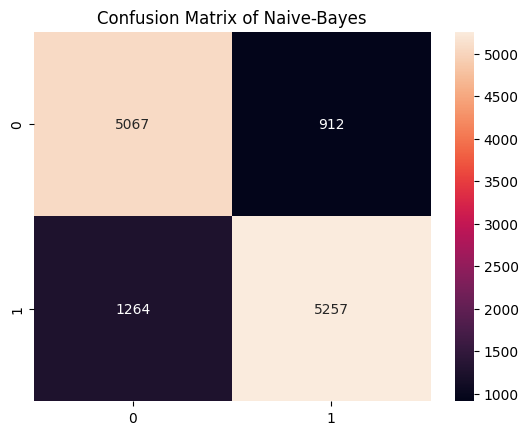

In [ ]:
model_nb = ComplementNB()
model_nb.fit(X_train_tfidf, y_train)

from sklearn import metrics
predicted_nb_tfidf = model_nb.predict(X_test_tfidf)
accuracy_nb_tfidf  = metrics.accuracy_score(predicted_nb_tfidf, y_test)
precision_nb_tfidf = metrics.precision_score(y_test, predicted_nb_tfidf, average='macro')
recall_nb_tfidf = metrics.recall_score(y_test, predicted_nb_tfidf, average='macro')
f1_score_nb_tfidf = metrics.f1_score(y_test, predicted_nb_tfidf, average='macro')
print('Naive-Bayes model accuracy is',str('{:04.2f}'.format(accuracy_nb_tfidf*100))+'%')
print('Naive-Bayes model precision rate is',str('{:04.2f}'.format(precision_nb_tfidf*100))+'%')
print('Naive-Bayes model recall rate is',str('{:04.2f}'.format(recall_nb_tfidf*100))+'%')
print('Naive-Bayes model f1 score is',str('{:04.2f}'.format(f1_score_nb_tfidf*100))+'%')

confusion_svm= confusion_matrix(predicted_nb_tfidf,y_test)
sns.heatmap(confusion_svm,annot=True,fmt='.0f')
plt.title("Confusion Matrix of Naive-Bayes")
plt.show()

In [ ]:
from sklearn.svm import LinearSVC, SVC
svm = SVC(probability=True)

# Fitting the Decision Tree Regression model to the data
svm.fit(X_train_tfidf, y_train)

SVC(probability=True)

In [ ]:
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_svm

array([0, 0, 0, ..., 1, 0, 1])

SVM model accuracy is 85.60%
SVM model precision rate is 82.68%
SVM model recall rate is 82.63%
SVM model f1 score is 82.59%


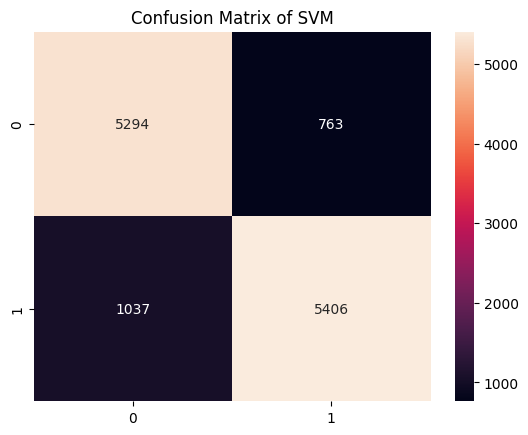

In [ ]:
from sklearn.metrics import accuracy_score
acc_svm = accuracy_score(y_test, y_pred_svm)
precision_svm_tfidf = metrics.precision_score(y_test, predicted_nb_tfidf, average='macro')
recall_svm_tfidf = metrics.recall_score(y_test, predicted_nb_tfidf, average='macro')
f1_score_svm_tfidf = metrics.f1_score(y_test, predicted_nb_tfidf, average='macro')
print('SVM model accuracy is',str('{:04.2f}'.format(acc_svm*100))+'%')
print('SVM model precision rate is',str('{:04.2f}'.format(precision_svm_tfidf*100))+'%')
print('SVM model recall rate is',str('{:04.2f}'.format(recall_svm_tfidf*100))+'%')
print('SVM model f1 score is',str('{:04.2f}'.format(f1_score_svm_tfidf*100))+'%')

from sklearn.metrics import confusion_matrix
confusion_svm= confusion_matrix(y_pred_svm,y_test)
sns.heatmap(confusion_svm,annot=True,fmt='.0f')
plt.title("Confusion Matrix of SVM")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10,criterion='entropy')
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [ ]:
y_pred_rf = rf.predict(X_test_tfidf)

Accuracy score of Random Forest Classifier: 0.79264


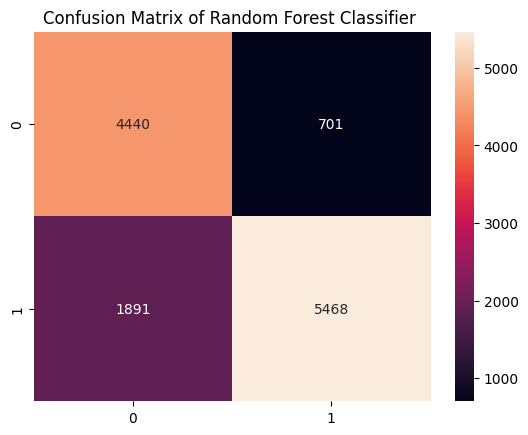

In [ ]:
from sklearn.metrics import accuracy_score
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy score of Random Forest Classifier:',acc_rf)

from sklearn.metrics import confusion_matrix
confusion_dt= confusion_matrix(y_pred_rf,y_test)
sns.heatmap(confusion_dt,annot=True,fmt='.0f')
plt.title("Confusion Matrix of Random Forest Classifier ")
plt.show()

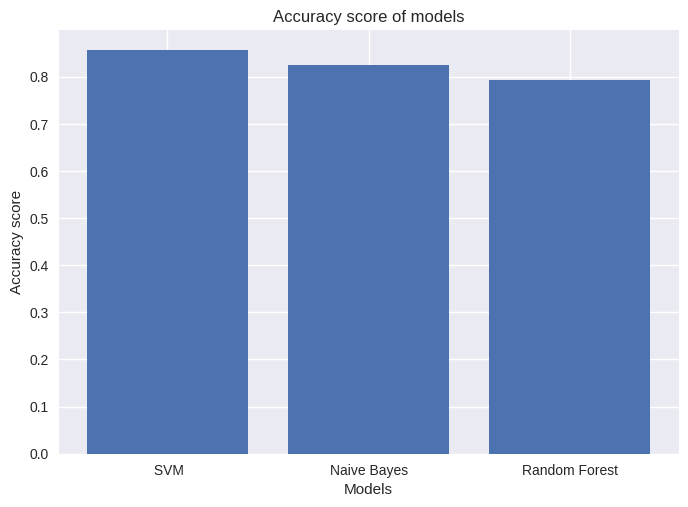

In [ ]:
models = [ 'Naive Bayes', 'Random Forest', ' SVM']
values = [accuracy_nb_tfidf, acc_rf, acc_svm]

# Sort the data by values in descending order
sorted_data = sorted(zip(models, values), key=lambda x: x[1], reverse=True)
models, values = zip(*sorted_data)

# Create a bar chart
plt.bar(models, values)

# Add labels and a title
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.title('Accuracy score of models')

# Show the chart
plt.show()

In [ ]:
nbpred_prob1 = model_nb.predict_proba(X_test_tfidf)
rfpred_prob2 = rf.predict_proba(X_test_tfidf)
svm_pred_prob3 = svm.predict_proba(X_test_tfidf)

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, nbpred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, rfpred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, svm_pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, nbpred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, rfpred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, svm_pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.9092878038343926 0.8838067367936027 0.9322795183595509


<ipython-input-46-45d68d922319>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


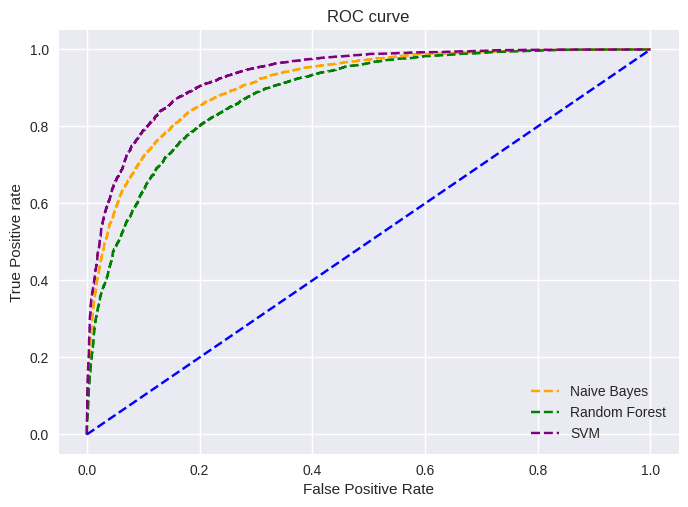

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='purple', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();